# Installing required packages

In [12]:
!pip install ultralytics

# Where to put the deciding line
Check for cap variable and put correct video file to reference.

Check for Line_Y vairable and adjust it to desired place.

Height: 1080
Current LINE_Y (height of line): 600


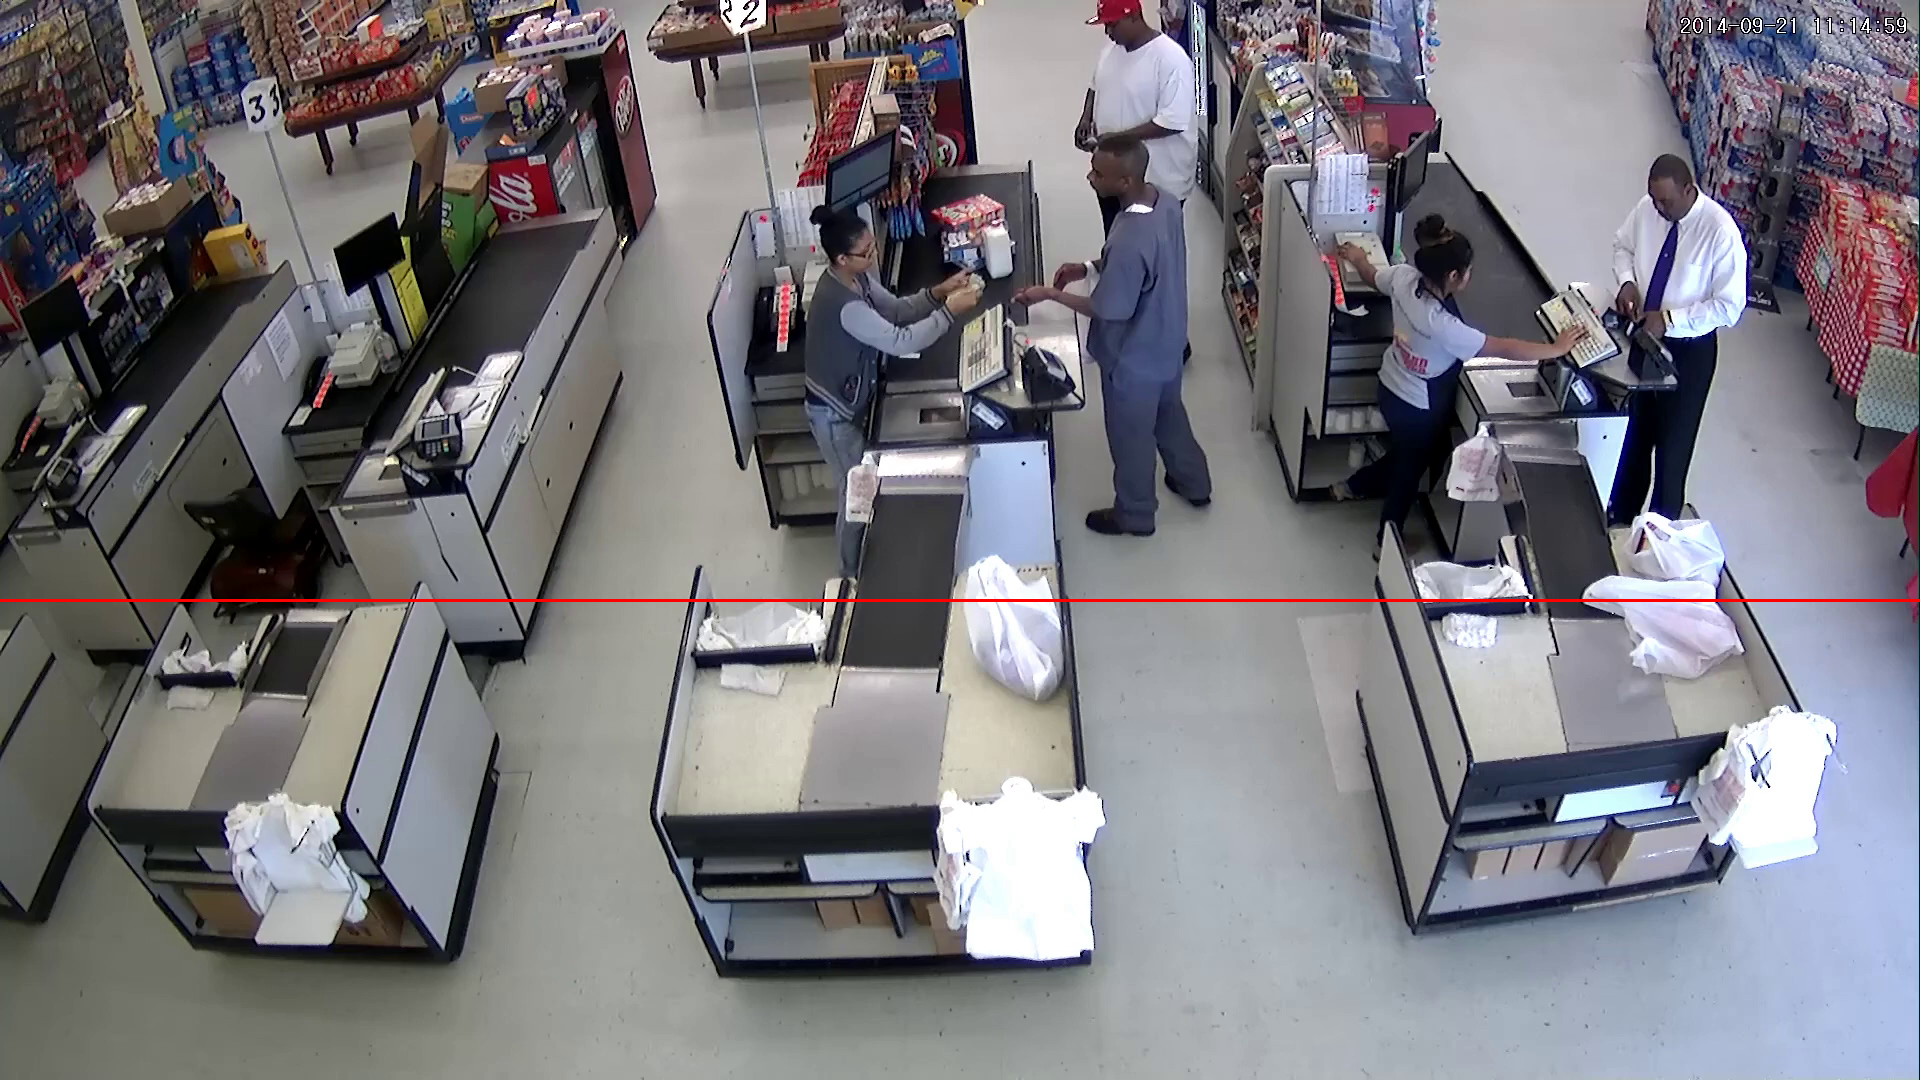

In [13]:
import cv2
# Colab-specific for displaying images as normal methods show error of notebook crashing
from google.colab.patches import cv2_imshow

# Open the video file with OpenCV
cap = cv2.VideoCapture('ww.mp4')

# Extract any frame using the index
frame_index = 100
count = 0
success, frame = False, None

while cap.isOpened() and not success:
    success, frame = cap.read()
    count += 1
    if count > frame_index:
        break

if not success:
    print(f"Could not extract frame at index.")
    cap.release()
else:

    # this is your line of deciding------------------------------------------##
    LINE_Y = 600

    # Draw the horizontal red line across the frame
    cv2.line(frame, (0, LINE_Y), (frame.shape[1], LINE_Y), (0, 0, 255), 2)

    # Print frame dimensions for reference (height is max y-value)
    print(f"Height: {frame.shape[0]}")
    print(f"Current LINE_Y (height of line): {LINE_Y}")

    # Display the frame with line in Colab output
    cv2_imshow(frame)

    cap.release()


# Inferencing and Counting the footfall

In [14]:
import cv2
from ultralytics import YOLO

# 1. Load your model
model = YOLO('yolo11n.pt')

# Open the video file with OpenCV
cap = cv2.VideoCapture('ww.mp4')

# Use from above experiment
LINE_Y = 600

# Store the *previous* Y-coordinate of each tracked object
track_history = {}

# A set to store the IDs of people who have *already crossed*
counted_ids = set()

while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO tracking on the frame
    results = model.track(frame, persist=True)

    # Check for detections
    if results[0].boxes.id is not None:
        tracker_ids = results[0].boxes.id.int().tolist()
        class_ids = results[0].boxes.cls.int().tolist()
        boxes = results[0].boxes.xyxy.tolist()

        for tracker_id, class_id, box in zip(tracker_ids, class_ids, boxes):

            # We only care about people (class 0)
            if class_id == 0:

                # Get the bottom-center Y-coordinate (y2)
                current_y = int(box[3])

                # --- Horizontal Crossing Logic ---
                if tracker_id in track_history:
                    prev_y = track_history[tracker_id]

                    # Check for crossing
                    # (prev_y > LINE_Y) AND (current_y <= LINE_Y)
                    if prev_y > LINE_Y and current_y <= LINE_Y:

                        if tracker_id not in counted_ids:
                            counted_ids.add(tracker_id)
                            print(f"New person counted! ID: {tracker_id}, Total: {len(counted_ids)}")

                # Update the history
                track_history[tracker_id] = current_y

# Cleanup
cap.release()

print(f"--- Final Count ---")
print(f"Total unique people detected: {len(counted_ids)}")


Streaming output truncated to the last 5000 lines.
0: 384x640 5 persons, 1 bench, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 11.2ms
Speed: 3.1ms preprocess, 11.2ms inference, 10.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 17.6ms
Speed: 6.6ms preprocess, 17.6ms inference, 18.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 13.5ms
Speed: 3.7ms preprocess, 13.5ms inference, 12.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 10.8ms
Speed: 6.0ms preprocess, 10.8ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 14.1ms
Speed: 4.6ms preprocess, 14.1ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bench, 12.1ms
Speed: 3.0ms preprocess, 12.1ms inference, 12.7ms postprocess per image at shape (1, 3, 38